<a href="https://colab.research.google.com/github/tiachoptinhdu/VietSeeds/blob/master/House_predict_Prattice_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 65.8MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 60.9MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 13.0MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 32.5MB/s]


In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
# read data head 
train.head()
train.shape
# they have 1460 columns and 81 features last features is price the thing we need to guess

(1460, 81)

In [8]:
test.shape
#Test file Look like train dataset but lack of price columns


(1459, 80)

In [9]:
#quantitative column
quantitative = list(train._get_numeric_data())
quantitative.remove('Id')
quantitative.remove('SalePrice')
print(len(quantitative))
quantitative
# We have 36 quantitative columns remove two columns ID and SalePrice

36


['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [10]:
#qualitative columns in case practice python so i need to use different method
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
['Utilities', 'Street', 'PoolQC',]
qualitative.remove('Utilities')
qualitative.remove('Street')
qualitative.remove('PoolQC')
print(len(qualitative))


# We have 43 qualitaitve columns

40


None


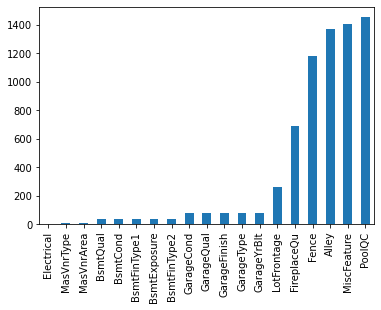

In [11]:
missing = train.isnull().sum()
missing = missing[missing>0]
print(missing.sort_values(inplace = True))
missing.plot.bar()
#

(array([ 11.,  38.,  99., 232., 273., 218., 176., 104.,  93.,  58.,  42.,
         35.,  24.,  10.,  17.,   8.,   7.,   4.,   2.,   1.,   1.,   2.,
          1.,   0.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.        ,  58903.33333333,  82906.66666667, 106910.        ,
        130913.33333333, 154916.66666667, 178920.        , 202923.33333333,
        226926.66666667, 250930.        , 274933.33333333, 298936.66666667,
        322940.        , 346943.33333333, 370946.66666667, 394950.        ,
        418953.33333333, 442956.66666667, 466960.        , 490963.33333333,
        514966.66666667, 538970.        , 562973.33333333, 586976.66666667,
        610980.        , 634983.33333333, 658986.66666667, 682990.        ,
        706993.33333333, 730996.66666667, 755000.        ]),
 <a list of 30 Patch objects>)

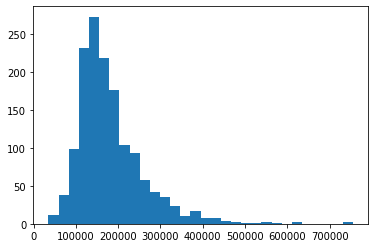

In [ ]:
plt.hist(list(train['SalePrice']), bins = 30) # View SalePrice data

In [12]:
#Seperate data into train and test from "train" variable
x_train = train.drop('Id', axis =1).drop('SalePrice', axis=1) # x_train is input for train model
x_test = test.drop('Id', axis = 1)
x_train = x_train.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
x_test = x_test.drop(['Utilities', 'Street', 'PoolQC',], axis=1)


In [13]:
all_columns = pd.concat([x_train, x_test])

In [14]:
y_train = train['SalePrice'] #y_train for output of train model


In [15]:
#one hot encoding for qualtitative columns
all_columns = pd.get_dummies(all_columns, dummy_na = True)
all_columns 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PavedDrive_nan,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_nan,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,NaN,0.0,0.0,0,0,0,0,0,0,0,6,2006,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [16]:
all_columns['BsmtFinSF1^2'] = all_columns['BsmtFinSF1'] * all_columns['BsmtFinSF1']
all_columns['TotalBsmtSF^2'] = all_columns['TotalBsmtSF'] * all_columns['TotalBsmtSF']
all_columns['GrLivArea^2'] = all_columns['GrLivArea'] * all_columns['GrLivArea']
quantitative.append('BsmtFinSF1^2')
quantitative.append('TotalBsmtSF^2')
quantitative.append('GrLivArea^2')


In [17]:
all_columns[quantitative] = all_columns[quantitative].apply(lambda x: (x-x.mean())/(x.std()))
all_columns[quantitative] = all_columns[quantitative].fillna(0)

In [ ]:
all_columns

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PavedDrive_nan,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_nan,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,0.067320,-0.184443,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.523038,0.580708,-0.29303,-0.934542,-0.444176,-0.773728,1.207172,-0.10118,0.413476,1.086464,-0.249767,0.781232,1.232388,0.169898,-0.207663,0.986680,-0.924153,0.973110,0.306423,0.348780,-0.740634,0.199972,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-1.551918,0.157619,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,-0.873466,0.458096,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.569893,1.177709,-0.29303,-0.629681,0.476948,0.261030,-0.784891,-0.10118,-0.471810,-0.819258,3.820454,0.781232,-0.756191,0.169898,-0.207663,-0.287709,0.623525,-0.082638,0.306423,-0.059772,1.614603,-0.702722,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-0.446848,-0.602858,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0.067320,-0.055935,0.137173,0.646073,-0.507197,0.980053,0.848819,0.333448,0.097840,-0.29303,-0.288418,-0.298974,-0.610614,1.235163,-0.10118,0.563659,1.086464,-0.249767,0.781232,1.232388,0.169898,-0.207663,-0.287709,0.623525,0.894907,0.306423,0.627338,-0.740634,-0.081195,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,1.026577,0.157619,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0.302516,-0.398622,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.569893,-0.494771,-0.29303,-0.047258,-0.671053,-0.506118,0.978574,-0.10118,0.427309,1.086464,-0.249767,-1.027187,-0.756191,0.169898,-0.207663,0.349486,0.623525,0.777601,1.619406,0.785188,-0.740634,-0.184783,3.874303,-0.103313,-0.285886,-0.063139,-0.089577,-1.551918,-1.363335,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,0.067320,0.629439,0.518814,1.355319,-0.507197,0.947040,0.753100,1.381770,0.468770,-0.29303,-0.161013,0.211501,-0.037164,1.671364,-0.10118,1.377806,1.086464,-0.249767,0.781232,1.232388,1.385418,-0.207663,1.623875,0.623525,0.855805,1.619406,1.685860,0.776834,0.540332,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,2.131647,0.157619,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.419286,-2.069222,-1.043758,-1.481667,1.289537,-0.043338,-0.682695,-0.569893,-0.968860,-0.29303,-0.033608,-1.147496,-1.563815,0.488723,-0.10118,-0.807744,-0.819258,-0.249767,-1.027187,1.232388,0.169898,-0.207663,-0.924904,-0.924153,0.000000,-2.319544,-2.195385,-0.740634,-0.702722,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-0.078492,-1.363335,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [18]:
# Split all_columns to x_train and x_test 
n = 1460 #size split data
x_train = all_columns.iloc[0:n,:]
x_test = all_columns.iloc[n:, :] 

In [19]:
model = tf.keras.models.Sequential([
                      tf.keras.layers.Flatten(),
                      tf.keras.layers.Dense(1),
])
model.compile(loss = 'mean_squared_logarithmic_error',  metrics = 'accuracy', optimizer = tf.keras.optimizers.Adam(10))
model.fit(x_train, y_train, epochs = 100, batch_size = 50, validation_split=0.05)
 


Epoch 1/100
28/28 [==============================] - 1s 12ms/step - loss: 26.2471 - accuracy: 0.0000e+00 - val_loss: 17.6515 - val_accuracy: 0.0000e+00
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 16.9254 - accuracy: 0.0000e+00 - val_loss: 16.2780 - val_accuracy: 0.0000e+00
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 15.9804 - accuracy: 0.0000e+00 - val_loss: 15.5333 - val_accuracy: 0.0000e+00
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 15.2271 - accuracy: 0.0000e+00 - val_loss: 14.9070 - val_accuracy: 0.0000e+00
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 14.6536 - accuracy: 0.0000e+00 - val_loss: 14.3462 - val_accuracy: 0.0000e+00
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 14.1443 - accuracy: 0.0000e+00 - val_loss: 13.8511 - val_accuracy: 0.0000e+00
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 13.6940 - accuracy: 

In [23]:
model.fit(x_train, y_train, epochs = 200, batch_size = 50, validation_split=0.05, )


Epoch 1/200
28/28 [==============================] - 0s 7ms/step - loss: 0.2006 - accuracy: 0.0000e+00 - val_loss: 0.1640 - val_accuracy: 0.0000e+00
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.1987 - accuracy: 0.0000e+00 - val_loss: 0.1624 - val_accuracy: 0.0000e+00
Epoch 3/200
28/28 [==============================] - 0s 2ms/step - loss: 0.1968 - accuracy: 0.0000e+00 - val_loss: 0.1609 - val_accuracy: 0.0000e+00
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.1950 - accuracy: 0.0000e+00 - val_loss: 0.1593 - val_accuracy: 0.0000e+00
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: 0.1931 - accuracy: 0.0000e+00 - val_loss: 0.1578 - val_accuracy: 0.0000e+00
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.0000e+00 - val_loss: 0.1563 - val_accuracy: 0.0000e+00
Epoch 7/200
28/28 [==============================] - 0s 2ms/step - loss: 0.1895 - accuracy: 0.0000e+00 - v

In [ ]:
model.evaluate(x_train, y_train)

46/46 [==============================] - 0s 835us/step - loss: 0.0137 - accuracy: 0.0000e+00


[0.01370514091104269, 0.0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 324)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 325       
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [24]:
i = 1459
print(model.predict(x_train.iloc[i,:].to_numpy().reshape(1,324)))
print(y_train[i])

[[136865.56]]
147500


In [25]:
x_train.iloc[0,:].to_numpy().shape

(324,)

In [26]:
new = pd.concat([test['Id'], pd.Series(model.predict(x_test.to_numpy()).reshape(1459,)) ], axis = 1)
new = new.rename(columns={0: 'SalePrice'})
new.to_csv('LvCH.csv', index=False)
